In [1]:
from reservoir import ESN
from misc import *
import numpy as np
import time
import SYCLOP_env as syc
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
def local_observer(sensor,agent):
    return np.concatenate([sensor.dvs_view[5,:].reshape([-1]),10*agent.qdot])
A = 0.5
A0 = 0
t_vec = np.array(list(range(1000)))
f_vec = 2*np.sin(2*np.pi*t_vec/30.0)

In [3]:
    hp=HP()
    hp.max_episode = 3000
    hp.steps_per_episode = 1000
    hp.steps_between_learnings = 1000

    recorder = Recorder(n=6)
    vertical_edge_mat = np.zeros([28,28])


    scene = syc.Scene(image_matrix=vertical_edge_mat)
    sensor = syc.Sensor()
    agent = syc.Agent(max_q = [scene.maxx-sensor.hp.winx,scene.maxy-sensor.hp.winy])
    reward = syc.Rewards()
    esn = ESN(n_inputs = 18)

    esn.hp.g=0.5
    esn.reset()
    esn.wfb = esn.wfb*0.1

    hp.scene = scene.hp
    hp.sensor = sensor.hp
    hp.agent = agent.hp
    hp.reward = reward.hp


In [4]:
def run_period(this_recorder):
    observation = local_observer(sensor,agent)
    for step in range(hp.steps_per_episode):
        esn.step(uin = observation.reshape([-1,1]))
        if training_on:
            esn.FORCE_step(f_vec[step])
        agent.qdot[0] = A0+A*esn.z
        agent.act(2)
        sensor.update(scene,agent)
        reward.update_rewards(sensor = sensor, agent = agent)
        observation_  = local_observer(sensor,agent) #todo: generalize
        this_recorder.record([agent.q_ana[0],agent.q[0],agent.qdot[0],reward.rewards[0],reward.rewards[1],reward.reward])
        observation = observation_
        step += 1

In [5]:
training_on = True
vertical_edge_mat[:,14:] = 1.0
scene = syc.Scene(image_matrix=vertical_edge_mat)
run_period(recorder)

<IPython.core.display.Javascript object>


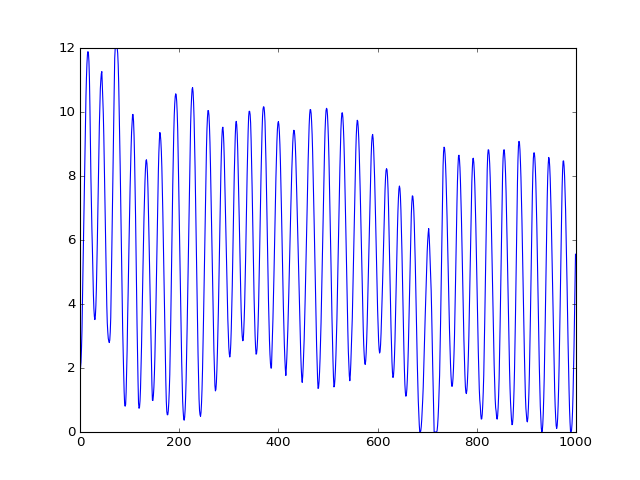

In [6]:
plt.figure()
plt.plot(recorder.records[0])

In [7]:
training_on = False

In [8]:
new_recorder = Recorder(n=6)

In [9]:
contrast_levels = [0,0.1,0.5,1,2,10]    
for ii, cc in enumerate(contrast_levels):    
    vertical_edge_mat = np.zeros([28,28])
    vertical_edge_mat[:,14:] = cc
    scene = syc.Scene(image_matrix=vertical_edge_mat)
    run_period(new_recorder)
    print(ii)

0
1
2
3
4
5


<IPython.core.display.Javascript object>


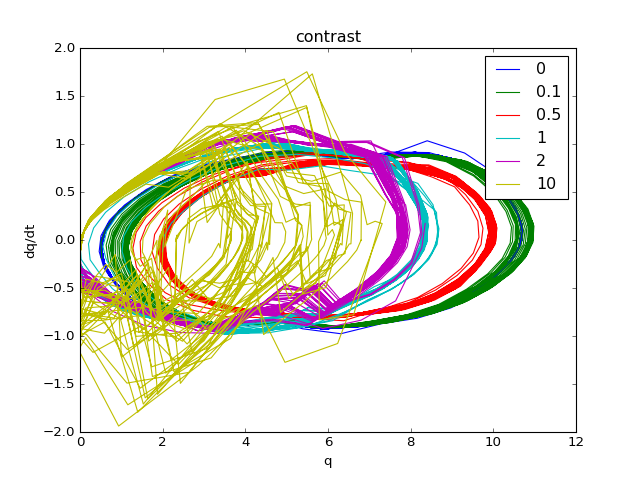

In [10]:
plt.figure()
for chunk in range(6):
    plt.plot(new_recorder.records[0][chunk*1000:(chunk+1)*1000],new_recorder.records[2][chunk*1000:(chunk+1)*1000])
plt.xlabel('q')
plt.ylabel('dq/dt')
plt.title('contrast')
plt.legend([str(uu) for uu in contrast_levels])

<IPython.core.display.Javascript object>


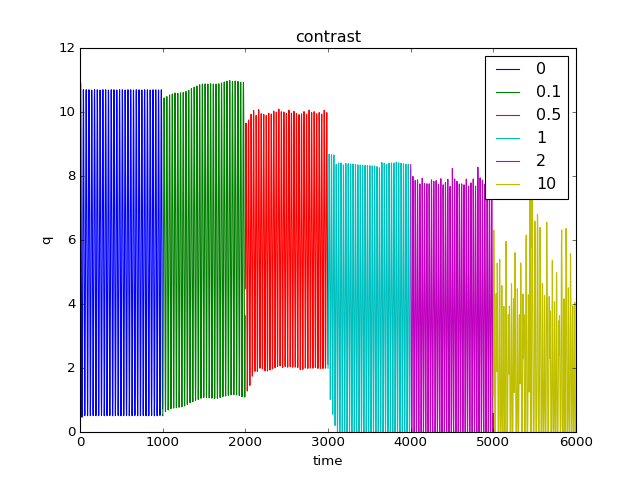

In [11]:
plt.figure()
for chunk in range(6):
    plt.plot(list(range(chunk*1000,(chunk+1)*1000)),new_recorder.records[0][chunk*1000:(chunk+1)*1000])
plt.legend([str(uu) for uu in contrast_levels])
plt.xlabel('time')
plt.ylabel('q')
plt.title('contrast')


In [12]:
new_recorder2 = Recorder(n=6)
edge_placement = [1,7,14,21,26]    
for ii, ee in enumerate(edge_placement):    
    vertical_edge_mat = np.zeros([28,28])
    vertical_edge_mat[:,ee:] = 1
    scene = syc.Scene(image_matrix=vertical_edge_mat)
    run_period(new_recorder2)
    print(ii)

0
1
2
3
4


<IPython.core.display.Javascript object>


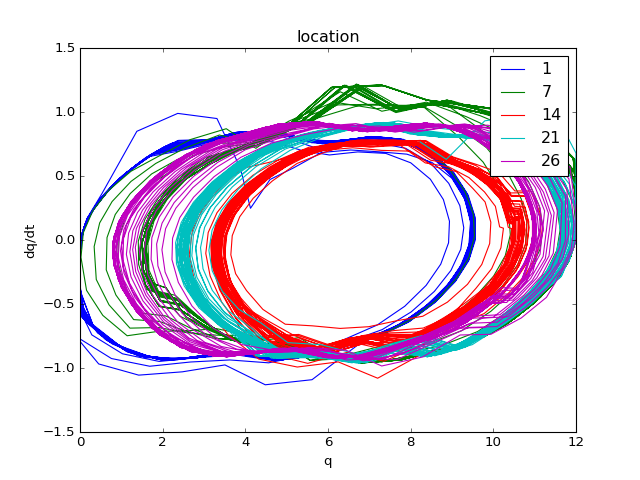

In [13]:
plt.figure()
for chunk in range(5):
    plt.plot(new_recorder2.records[0][chunk*1000:(chunk+1)*1000],new_recorder2.records[2][chunk*1000:(chunk+1)*1000])
plt.xlabel('q')
plt.ylabel('dq/dt')
plt.title('location')
plt.legend([str(uu) for uu in edge_placement])

<IPython.core.display.Javascript object>


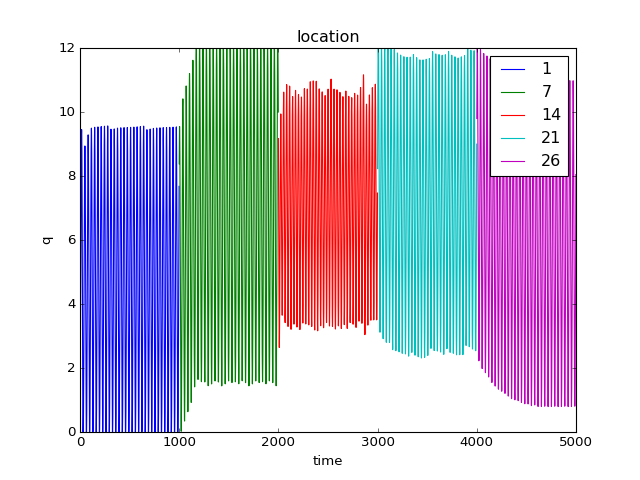

In [14]:
plt.figure()
for chunk in range(5):
    plt.plot(list(range(chunk*1000,(chunk+1)*1000)),new_recorder2.records[0][chunk*1000:(chunk+1)*1000])
plt.legend([str(uu) for uu in edge_placement])
plt.title('location')
plt.xlabel('time')
plt.ylabel('q')